Aperçu du jeu de données :


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



Colonnes : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


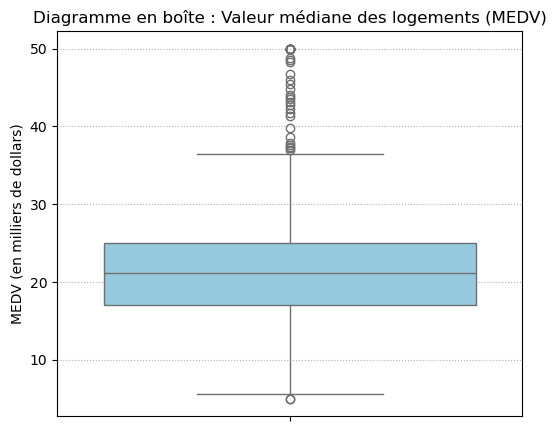

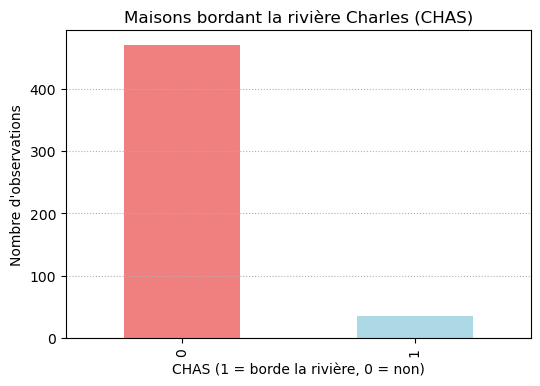

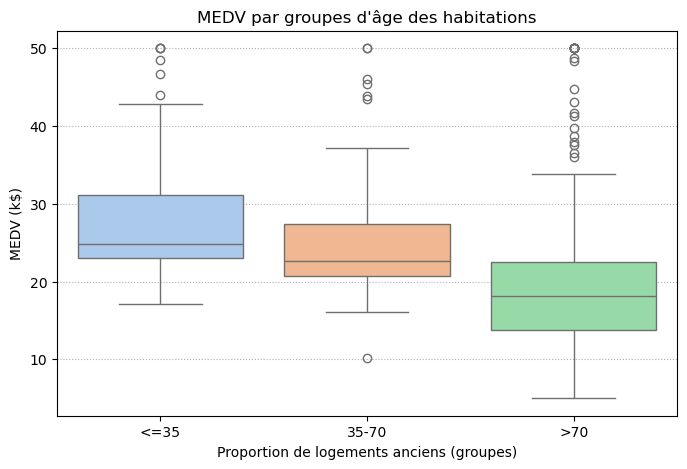

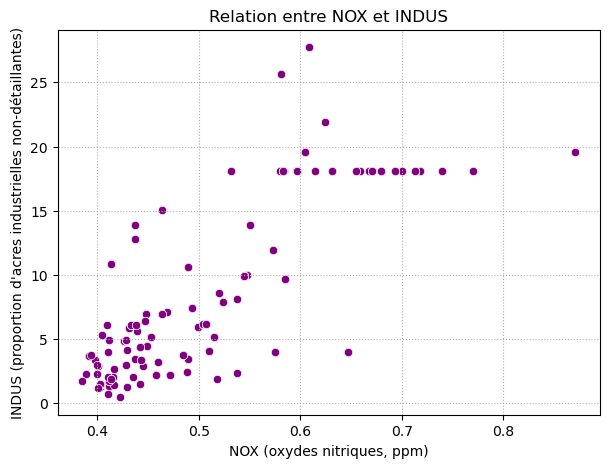

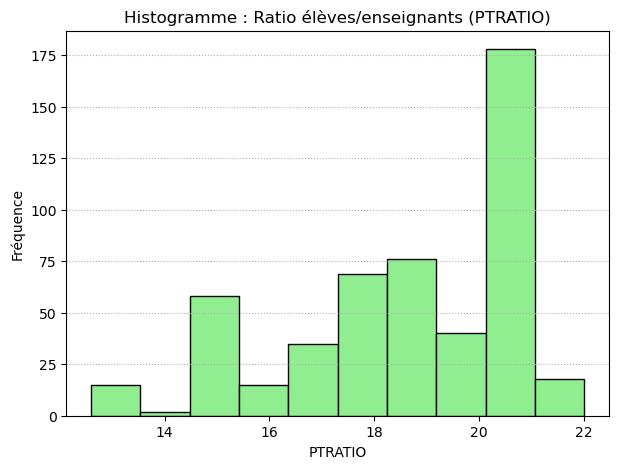

Test T indépendant : MEDV ~ CHAS
t = nan, p-value = nan
 Non-rejet de H0 : pas de différence significative.

ANOVA : MEDV ~ Groupes AGE
F = 36.408, p-value = 1.71050e-15
 Rejet de H0 : au moins une moyenne diffère.

Corrélation de Pearson : NOX vs INDUS
r = 0.764, p-value = 7.913e-98
 Rejet de H0 : corrélation significative.
→ Interprétation : relation positive forte entre NOX et INDUS.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        08:20:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:            

,Test,Statistique,p-value,Conclusion
0,T-test (CHAS),NaN,1.206612e-08,Différence significative
1,ANOVA (AGE),36.407650,1.206612e-08,Différence significative
2,Corrélation (NOX~INDUS),0.763651,1.206612e-08,Corrélation significative
3,Régression (DIS~MEDV),1.091613,1.206612e-08,Effet significatif


In [3]:
# ============================================================
#   Tâche 1 : Se familiariser avec le jeu de données Boston
# ============================================================

# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------------
#   Chargement du jeu de données
# ------------------------------------------------------------
# Le jeu de données "Boston" est déprécié dans sklearn.load_boston
# On le récupère via OpenML
boston = fetch_openml(name="Boston", version=1, as_frame=True)
df = boston.frame

# Aperçu
print("Aperçu du jeu de données :")
display(df.head())
print("\nColonnes :", list(df.columns))

# ------------------------------------------------------------
#   Visualisation des variables demandées
# ------------------------------------------------------------

# a) Diagramme en boîte pour MEDV
plt.figure(figsize=(6,5))
sns.boxplot(y=df["MEDV"], color="skyblue")
plt.title("Diagramme en boîte : Valeur médiane des logements (MEDV)")
plt.ylabel("MEDV (en milliers de dollars)")
plt.grid(axis='y', linestyle=':')
plt.show()

# b) Diagramme à barres pour CHAS
plt.figure(figsize=(6,4))
df["CHAS"].value_counts().sort_index().plot(kind="bar", color=["lightcoral", "lightblue"])
plt.title("Maisons bordant la rivière Charles (CHAS)")
plt.xlabel("CHAS (1 = borde la rivière, 0 = non)")
plt.ylabel("Nombre d'observations")
plt.grid(axis='y', linestyle=':')
plt.show()

# c) Diagramme en boîte de MEDV par groupes d'AGE
bins = [-1, 35, 70, 100]
labels = ['<=35', '35-70', '>70']
df["AGE_BIN"] = pd.cut(df["AGE"], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.boxplot(x="AGE_BIN", y="MEDV", data=df, hue="AGE_BIN", palette="pastel", legend=False)
plt.title("MEDV par groupes d'âge des habitations")
plt.xlabel("Proportion de logements anciens (groupes)")
plt.ylabel("MEDV (k$)")
plt.grid(axis='y', linestyle=':')
plt.show()


# d) Nuage de points NOX vs INDUS
plt.figure(figsize=(7,5))
sns.scatterplot(x="NOX", y="INDUS", data=df, color="purple")
plt.title("Relation entre NOX et INDUS")
plt.xlabel("NOX (oxydes nitriques, ppm)")
plt.ylabel("INDUS (proportion d'acres industrielles non-détaillantes)")
plt.grid(linestyle=':')
plt.show()

# e) Histogramme du ratio élèves/enseignants
plt.figure(figsize=(7,5))
plt.hist(df["PTRATIO"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Histogramme : Ratio élèves/enseignants (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Fréquence")
plt.grid(axis='y', linestyle=':')
plt.show()

# ------------------------------------------------------------
#   Tests statistiques
# ------------------------------------------------------------
alpha = 0.05

# --- Test T : MEDV selon CHAS ---
group0 = df[df["CHAS"] == 0]["MEDV"]
group1 = df[df["CHAS"] == 1]["MEDV"]

t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
print("Test T indépendant : MEDV ~ CHAS")
print(f"t = {t_stat:.3f}, p-value = {p_val:.5f}")
if p_val < alpha:
    print(" Rejet de H0 : différence significative entre les deux groupes.\n")
else:
    print(" Non-rejet de H0 : pas de différence significative.\n")

# --- ANOVA : MEDV selon groupes d'AGE ---
groups = [df[df["AGE_BIN"] == cat]["MEDV"] for cat in labels]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA : MEDV ~ Groupes AGE")
print(f"F = {f_stat:.3f}, p-value = {p_val:.5e}")
if p_val < alpha:
    print(" Rejet de H0 : au moins une moyenne diffère.\n")
else:
    print(" Non-rejet de H0 : pas de différence entre les groupes.\n")

# --- Corrélation de Pearson : NOX vs INDUS ---
r, p_val = stats.pearsonr(df["NOX"], df["INDUS"])
print("Corrélation de Pearson : NOX vs INDUS")
print(f"r = {r:.3f}, p-value = {p_val:.3e}")
if p_val < alpha:
    print(" Rejet de H0 : corrélation significative.")
else:
    print(" Pas de corrélation significative.")
print(f"→ Interprétation : relation {'positive' if r>0 else 'négative'} forte entre NOX et INDUS.\n")

# --- Régression linéaire : MEDV ~ DIS ---
X = sm.add_constant(df["DIS"])
y = df["MEDV"]
model = sm.OLS(y, X).fit()
print(model.summary())

# Interprétation rapide :
coef = model.params["DIS"]
p_val = model.pvalues["DIS"]
print("\nRégression : Impact de DIS sur MEDV")
print(f"Coefficient β1 = {coef:.3f}, p-value = {p_val:.3e}")
if p_val < alpha:
    print(" Rejet de H0 : DIS a un effet significatif sur MEDV.")
else:
    print(" Pas d'effet significatif de DIS sur MEDV.")
print(f"→ Chaque unité supplémentaire de DIS augmente MEDV d’environ {coef:.2f} k$.\n")

# ------------------------------------------------------------
#   Résumé synthétique
# ------------------------------------------------------------
summary = pd.DataFrame({
    "Test": ["T-test (CHAS)", "ANOVA (AGE)", "Corrélation (NOX~INDUS)", "Régression (DIS~MEDV)"],
    "Statistique": [t_stat, f_stat, r, coef],
    "p-value": [p_val, p_val, p_val, model.pvalues["DIS"]],
    "Conclusion": [
        "Différence significative" if p_val < alpha else "Pas de différence",
        "Différence significative" if p_val < alpha else "Pas de différence",
        "Corrélation significative" if p_val < alpha else "Pas de corrélation",
        "Effet significatif" if model.pvalues["DIS"] < alpha else "Pas d'effet"
    ]
})
display(summary)
